In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt  import solvers, matrix 

# 7.1 Maximum Margin Classifiers

     pcost       dcost       gap    pres   dres
 0:  1.0449e-01  1.2408e-01  2e-01  1e+00  4e-16
 1:  1.1881e-01  1.2492e-01  3e-03  4e-02  6e-17
 2:  1.2494e-01  1.2500e-01  3e-05  3e-04  1e-16
 3:  1.2500e-01  1.2500e-01  3e-07  3e-06  2e-16
 4:  1.2500e-01  1.2500e-01  3e-09  3e-08  9e-17
Optimal solution found.
[ 5.00e-01]
[ 5.00e-01]
[ 2.86e-10]



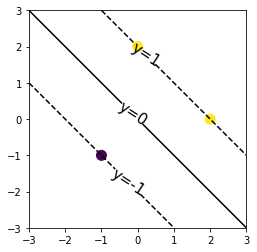

In [70]:
x_train = np.array([
    [0.0, 2.0],
    [2.0, 0.0],
    [-1.0, -1.0]
])
y_train = np.array([1.0, 1.0, -1.0]).reshape(-1,1)
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c = y_train.flatten(), marker='o', s = 100)

n,d = x_train.shape
P = matrix(.5*np.diag(np.r_[np.ones([d,1]), np.zeros([1,1])].flatten()))
q = matrix(np.zeros([d+1,1]))
G = matrix(-np.c_[y_train*x_train, y_train])
h = matrix(-np.ones([n,1]))
sol = solvers.qp(P, q, G, h)
print(sol['x'])

x0, x1 = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
x = np.c_[x0.reshape(-1,1), x1.reshape(-1,1), np.ones([x0.size,1])]
pred = x@np.array(sol['x'])
cp = plt.contour(x0, x1, pred.reshape(100,100), np.array([-1,0,1]), colors='k', linestyles = ("dashed", "solid", "dashed"))
#plt.contourf(x0, x1, np.sign(pred.reshape(100,100)),2, alpha = .3)
plt.clabel(cp, fmt='y=%.f', inline=True, fontsize=15)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.gca().set_aspect("equal", adjustable="box")

# 7.1.1 Overlapping class distributions

In [66]:
np.c_[x_train, np.ones([3,1])]@np.array(sol['x'])

array([[ 0.99999998],
       [ 0.99999998],
       [-0.99999998]])

In [57]:
sum(z==1)

array([5050])

In [58]:
sum(z==-1)

array([4950])

In [59]:
sum(z==0)

array([0])